In [3]:
%pylab inline

import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Introduction

ANOVA는 Analysis of Variance의 약자로서, 2개 이상의 그룹의 평균을 비교하고자 할때 Anova를 사용합니다.<br>
T-test와 유사한데 차이는 T-test는 2개의 그룹일때만 사용하고, 2개 이상일때는 ANOVA를 사용합니다.

* Tests 
  * Continuous VS Category : ANOVA 사용
  * Category VS Category : Chi-sqaure test 사용
 
* Effect Size (얼마나 관련성이 있는지..) 
  * Continous VS Category: intraclass correlation 사용
  * Category VS Category: Cramer's V 사용

* One-way ANOVA
  * 모든 그룹의 평균값은 동일한가? (예. 연령별 (20대, 30대, 40대, 50대) 에서 커피에 대한 선호도 차이 유무를 검정
  * t-test와 유사하지만, 2개 이상의 그룹을 비교할때 사용할 수 있다. (t-test는 2개만 가능)
  

# ANOVA 

## Grand Mean

$$ \mu_{GM} = \frac{\sum x}{N} = \frac{\sum n \bar{x}}{\sum n} $$

ANOVA에서는 2종류의 평균값이 사용이 됩니다. <br>
첫번째는 각 그룹들의 표본평균 $ \mu_1, \mu_2, \mu_3, ... $  그리고 **grand mean** $ \mu $ 를 사용합니다. <br>
grand mean은 각각의 표본평균들에 대한 평균값이라고 보면 됩니다. 



## Null Hypothesis 

* $ H_0 $ : $ \mu_1 = \mu_2 = .. = \mu_k $ 즉 귀무가설은 모든 그룹의 평균은 정확하게 일치한다 있다. 
* $ H_A $ : $ \mu_l \ne \mu_m $ : 최소한 한개의 그룹은 $ \mu_i $ 는 나머지 그룹과 다은 평균값을 갖고 있다.


$ \mu $ 는 해당 그룹의 평균이고, k는 그룹의 갯수입니다. <br>
$ \mu_l $ 그리고 $ \mu_m $ 은 전체 샘플 중에 아무거나 특정 표본평균을 뜻 합니다.


## Between Group Variability


$$ SS_{\text{between}} = \sum^{k}_{i=1} n_i ( \bar{x}_i - \bar{X}_{GM} )^2 $$ 

* 서로 다른 두개의 그룹을 SS 로 표현을 합니다. SS는 Sum of squares의 약자. 
* 만약 각 그룹간의 표본평균이 서로 가깝다면, Grand Mean 과의 차이도 작을 것 입니다. 
* $ n_i $ 는 각 그룹의 갯수를 사용해서 각각의 제곱편차(squared deviation)에 weight값으로 사용을 합니다. 

쉽게 공식을 풀어 쓰면 다음과 같습니다.

$$ SS_{\text{between}} = n_1 (\bar{x}_1 - \bar{x}_{GM})^2 + n_2 (\bar{x}_2 - \bar{x}_{GM})^2 + n_3 (\bar{x}_3 - \bar{x}_{GM})^2 + ... + n_k (\bar{x}_k - \bar{x}_{GM})^2 $$

아래의 두 표본의 분포를 보면, 서로 겹치는 부분이 있습니다. 각각의 표본평균과 grand mean의 차이는 크지 않을 것 입니다.

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


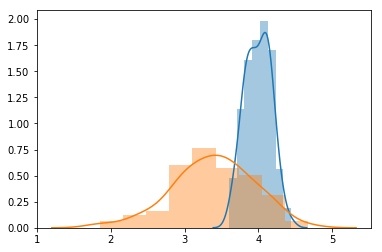

In [4]:
def plot_normal_dist(means, sigmas):
    for i, (sample_mean, sigma) in enumerate(zip(means, sigmas)):
        normal_data = np.random.normal(sample_mean, scale=sigma, size=100)
        sns.distplot(normal_data)

means = [4, 3.5]
sigmas = [0.2, 0.5]
plot_normal_dist(means, sigmas)


반면에 아래의 두 표본분포를 서로 크게 떨어져 있습니다. 이 경우 각각의 표본 평균과 grand mean은 서로 크게 차이가 날 것입니다. 

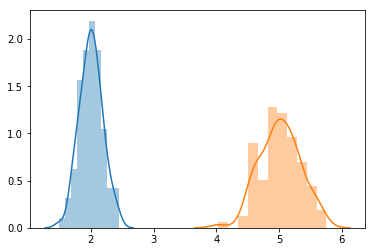

In [50]:
plot_normal_dist([2, 5], [0.2, 0.3])

이렇게 각 표본분포간의 차이를 **Between-group variability** 라고 합니다. 

between-group variability의 경우 자유도는 표본 평균의 갯수 k에 -1 을 한 것입니다.

$$ MS_{\text{between}} = \frac{\sum^{k}_{i=1} n_i(\bar{x}_i - \bar(x)_{GM})}{k-1} $$

* k : 그룹의 갯수

## Within-Group Variability


$$ \begin{align} SS_{\text{within}} &= \sum (n_{1i}-\bar{x}_1) + \sum(n_{2i}-\bar{x}_2) + ... + \sum(n_{ki}-\bar{x}_k) \\
&= \sum (x_{ij} - \bar{x}_j)^2
\end{align} $$

> $ n_{1i} $ 라는 뜻은 첫번째 샘플에서의 i번째의 값을 의미 합니다. <br>
> $ n_{2i} $ 라는 뜻은 두번째 샘플에서의 i번째의 값을 의미 합니다. <br>
> $ n_{ji} $ 라는 뜻은 j번째 샘플에서의 i번째 값을 의미 합니다.

예를 들어서 아래 세개의 표본에 대한 분포를 그렸습니다. <br>
각 그룹들이 옆으로 더 퍼질수록 (variability), 각 그룹들의 분포는 서로 겹치게 되고, 하나의 큰 population이 되게 됩니다.

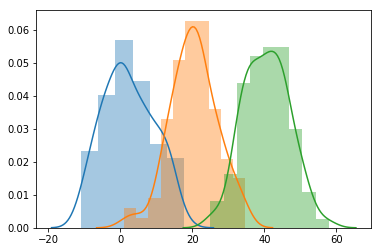

In [14]:
plot_normal_dist([1, 20, 40], [7, 7, 7])

이번에는 위와 동일한 평균값을 갖고 있지만, 적은 변동성 (variability)을 갖고 있는 분포를 보도록 하겠습니다.<br>
위와 동일하게 샘플들간의 표본평균은 동일하지만, 서로 완전히 다른 population에 종속이 되어 있습니다.

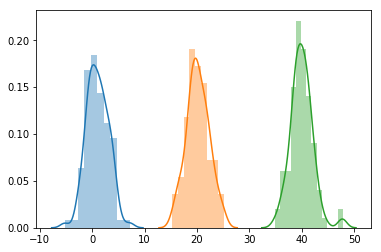

In [18]:
plot_normal_dist([1, 20, 40], [2, 2, 2])

위와 같이 각 샘플안에서의 variation을 **Within-group Variation**이라고 합니다.<br>
즉 Between-group variability는 **각 샘플들 사이의 표본평균의 차**를 구했다면.. <br>
Within-group variation에서는 **각각의 샘플들 마다 존재하는 편차**를 구하게 됩니다.

Between-group variability에서 했듯이, 제곱편차의 합을 **degrees of freedom**으로 나누어 줄수 있습니다. <br>
이렇게 나누어 주면 좀더 덜 편향된 (less biased) estimator를 구할 수 있습니다.<br>

Within-group variability의 degrees of freedom은 전체 샘플 크기들의 합 (sum of the sample sizes) N 에다 샘플듯의 갯수 k 를 빼주게 됩니다.<br>

$$ \text{MS}_{\text{within}} = \frac{\sum (x_{ji} - \bar{x}_i)^2}{N-k} $$

* MS: mean sum of square
* N : 전체 데이터 갯수
* k : 샘플들의 갯수

## Degree of Freedom

각 공식별 degree of freedoms은 다음과 같이 정의 할 수 있습니다.

* $ DOF(SS_{between}) = k -1 $
* $ DOF(SS_{within}) = N - k $
* $ DOF(total) = N - 1 $

## F Test 

독립변수와 종속변수 사이의 관계성을 테스트하기 위해서는 F distribution이 사용이 됩니다. 

$$ F = \frac{MS_{between}}{MS_{within}} $$

* $ MS_{\text{between}} $ : mean sum of squares due to treatment
* $ MS_{\text{within}} $ : mean sum of squares due to error

표본평균들간의 차이를 나타낸 것을 **F-Ratio** 라고 합니다. <br>
<span style="color:red">
**F-Ratio의 값이 1또는 그이하라면, 표본평균들은 서로 유사하다고 볼수 있으며,<br>
    표본평균들이 모두 모평균과 동일하다는 귀무가설이 맞게 됩니다..**<br>
**만약 F-Ratio의 값이 매우 높다면, 귀무가설은 기각이 됩니다.**
    </span>

앞서 언급했듯이 between-group variability(그룹 간 변동성) 증가할수록, 표본평균들간의 거리는 서로 더 멀리 떨어져 있다고 볼 수 있습니다.<br>
즉 멀어지면 멀어질수록 다른 모집단에 속해 있을 가능성이 큽니다. 

![Anova01](images/anova-01.png)
<p style="text-align:center">Source: Dr. Asim’s Anatomy Cafe</p>

z 그리고 t-distributions과는 다르게, F-distribution은 negative value가 없습니다. <br>
이유는 between group이나 within group 모두 각 편차를 제곱(squaring each deviation)하기 때문입니다. 

따라서 아래 그래프에서 보듯이 임계 영역(critical region)은 오른쪽 꼬리(right tail)에 한군데 존재합니다. 

**만약 F-statistic값이 해당 임계 영역안에 있다면 서로간의 표본평균들은 매우 다르기 때문에 귀무가설을 기각할 수 있습니다.**<br>

![Anova01](images/anova-02.png)
<p style="text-align:center">Source: Statistics How To</p>

임계 영역을 나누는 critical value를 찾아야 하는데, 이때 [F-table](http://users.sussex.ac.uk/~grahamh/RM1web/F-ratio%20table%202005.pdf)을 사용하게 됩니다.

# One Way ANOVA 

예제를 갖고서 설명을 하겠습니다. <br>

그룹 X, Y, Z그룹으로 나뉘어 지며, 공부 방법에 따른 성적이라고 생각하면 됩니다. 


In [168]:
data = pd.DataFrame([[7, 9, 5, 8, 6, 8, 6, 10, 7, 4], 
                     [4, 3, 6, 2, 7, 5, 5, 4, 1, 3],
                     [6, 1, 3, 5, 3, 4, 6, 5, 7, 3]]).T

data.columns = ('X', 'Y', 'Z')

print('[표본평균]')
print(data.mean(axis=0))
print()

print('[Grand Mean]')
print(data.mean(axis=0).mean())

[표본평균]
X    7.0
Y    4.0
Z    4.3
dtype: float64

[Grand Mean]
5.1000000000000005


* 각 그룹의 표본평균: $ \mu_1 = 7 $, $ \mu_2 = 4 $, $ \mu_3 = 4.3 $
* 전체 평균 (Grand Mean): $ \mu = 5.1 $ 


## Boxplot 을 통한 분석

간단하게는 boxplot을 통해서 대략의 인싸이트를 얻을 수 있습니다. <br>

> 아래에서도 언급하겠지만, boxplot만 갖고서 결론을 내리기에는 부족합니다.

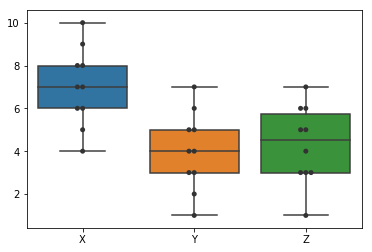

In [169]:
sns.boxplot(data=data)
sns.swarmplot(data=data, color='.2')


> Boxplot을 통해서 분산분석을 하는 것은 꽤 유용합니다.<br>
> 다만 **boxplot만 보고서 판단은 할 수가 없습니다.** <br>
> $ SS_{between} $ 에서 보면, n * square of deviation 을 하게 되는데.. 여기서 n값이 weight값으로 사용이 됩니다. <br>
> 즉 boxplot자체에는 각 샘플마다 얼마나 중요도가 있는지 알 수가 없으며, <br>
> 또한 각 표본평균들간에 실제로 얼마나 차이가 나고 의미가 있는지, 분산이 큰것과는 어떤 관계가 있는지 등등 유의성을 알 수가 없습니다.<br>
> 이 경우 일원분산분석이나 이원분산분석등을 사용하게 됩니다.

## With Scipy

Scipy를 이용해서 두개 이상의 그룹이 동일한 모평균을 갖고 있다는 귀무가설을 테스트 할 수 있습니다. <br>
이때 P-value가 유효하기 위해서는 다음의 가정이 충족되어야 합니다.

* 표본들은 모두 독립적이다. 
* 각각의 표본들은 정규분포를 따른다
* 모든 그룹들의 모표준편차 (population standard deviations of the groups) 는 모두 동일하다

만약 위의 가정들이 맞지 않는다면, Kruskal Wallis H-test 같은 다른 방법을 사용해야 합니다.

In [241]:
from scipy import stats

F_statistic, p_value = stats.f_oneway(data['X'], data['Y'], data['Z'])
print('F={0:.4f}, p={1:.5f}'.format(F_statistic, p_value))

F=8.1809, p=0.00167


위에서 P-value 값이 0.05보다 작기 때문에 통계적으로 유의미함을 나타냅니다. <br>
또한 F-statistic값이 8.18이라는 뜻은 between-group variance가 within-group variance보다 약 8.18배 더 크다는 뜻입니다.<br>
결론적으로 표본평균은 모두 동일하다는 귀무가설을 기각할수 있습니다.

Scipy에서 제공하는 라이브러리의 문제점은 F-critical value 를 따로 계산을 해주어야 합니다.<br>
이때 scipy.stats.f 안의 ppf를 사용해서 critical value를 계산할 수 있습니다. 

In [316]:
from scipy.stats import f, norm

N = data.shape[0] # 10
k = data.shape[1] # 3

dfn = k - 1 # degree of freedom numerator -> k - 1 
dfd = N - k # degree of freedom denominator -> N - K 
critical_value = f.ppf(q=0.95, dfn=dfn, dfd=dfd)

print('Degree of freedom Numerator  : {0} - 1 = {1}'.format(k, dfn) )
print('Degree of freedom Denominator: {0} - {1} = {2}'.format(N, k, dfd))
print('Critical Value (rejection)   :', critical_value)

Degree of freedom Numerator  : 3 - 1 = 2
Degree of freedom Denominator: 10 - 3 = 7
Critical Value (rejection)   : 4.73741412777588


mean: 1.4 variance: 4.573333333333333 skew: 11.783766072743589 kurt: nan


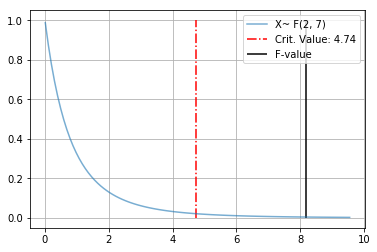

In [305]:
def plot_f_distribution(dfn, dfd, f_value=None):
    critical_value = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    print('mean:', mean, 'variance:', var, 'skew:', skew, 'kurt:', kurt)
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), f.ppf(0.99, dfn, dfd), 100)
    
    # Plotting
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, label='X~ F({0}, {1})'.format(dfn, dfd))
    plt.vlines(critical_value, 0.0, 1.0, linestyles='dashdot', 
               label='Crit. Value: {:.2f}'.format(critical_value), color='red')
    
    if f_value is not None:
        plt.vlines(f_value, 0., 1., label='F-value')
    plt.legend()
    plt.grid()
    

plot_f_distribution(dfn, dfd, 8.1809)

## With Statsmodel

In [248]:
data2 = data.melt(value_vars=['X', 'Y', 'Z'], var_name='group')
data2['group'] = data2['group'].astype('category')
data2.head()

,group,value
0,X,7
1,X,9
2,X,5
3,X,8
4,X,6


In [247]:
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

lm = ols('value ~ C(group)', data2).fit()
display(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     8.181
Date:                Tue, 11 Dec 2018   Prob (F-statistic):            0.00167
Time:                        12:01:46   Log-Likelihood:                -59.064
No. Observations:                  30   AIC:                             124.1
Df Residuals:                      27   BIC:                             128.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.0000      0.578     12.118      0.000       5.815       8.185
C(group)[T.Y]    -3.0000      0.817     -3.672      0.001      -4.676      -1.324
C(group)[T.Z]    -2.7000      0.817     -3.305      0.003      -4.376      -1.024
==============================================================================
Omnibus:                        1.042   Durbin-Watson:                   2.478
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                0.845
Skew:                          -0.079   Prob(JB):                        0.655
Kurtosis:                       2.193   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Another Example with Statsmodel

In [211]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore = sm.datasets.get_rdataset("Moore", "carData", cache=True).data
moore.rename(columns={'partner.status': 'partner_status'}, inplace=True) # make name pythonic
display(moore.head())

,partner_status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [230]:
moore_lm = ols('conformity ~ C(fcategory, Sum) * C(partner_status, Sum)', data=moore).fit()
display(moore_lm.summary())

sm.stats.anova_lm(moore_lm, typ=2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             conformity   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3.734
Date:                Tue, 11 Dec 2018   Prob (F-statistic):            0.00740
Time:                        11:40:56   Log-Likelihood:                -129.10
No. Observations:                  45   AIC:                             270.2
Df Residuals:                      39   BIC:                             281.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   12.0508      0.728     16.564      0.000      10.579      13.522
C(fcategory, Sum)[S.high]                                    0.1903      0.999      0.191      0.850      -1.830       2.210
C(fcategory, Sum)[S.low]                                     1.0992      1.026      1.071      0.291      -0.977       3.175
C(partner_status, Sum)[S.high]                               2.4591      0.728      3.380      0.002       0.988       3.931
C(fcategory, Sum)[S.high]:C(partner_status, Sum)[S.high]    -2.8431      0.999     -2.847      0.007      -4.863      -0.823
C(fcategory, Sum)[S.low]:C(partner_status, Sum)[S.high]      1.7909      1.026      1.745      0.089      -0.285       3.867
==============================================================================
Omnibus:                        2.500   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.287   Jarque-Bera (JB):                1.712
Skew:                           0.465   Prob(JB):                        0.425
Kurtosis:                       3.216   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,sum_sq,df,F,PR(>F)
"C(fcategory, Sum)",11.614700,2.0,0.276958,0.759564
"C(partner_status, Sum)",212.213778,1.0,10.120692,0.002874
"C(fcategory, Sum):C(partner_status, Sum)",175.488928,2.0,4.184623,0.022572
Residual,817.763961,39.0,NaN,NaN


In [237]:
MSB = 11.6147 / 2.
MSE = 817.763961/39.

print('F-statistic for fcategory:', MSB/MSE)
print('F-statistic for partner_status:', (212.213778/1.)/MSE)
print('F-statistic for fcategory + partner_status:', (175.488928/2.)/MSE)

F-statistic for fcategory: 0.276958463323624
F-statistic for partner_status: 10.120692200570085
F-statistic for fcategory + partner_status: 4.1846232644140695


# References

* https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/